# Kitchenware Classification Dataset Generator

In [34]:
from collections import defaultdict
from hashlib import md5
from pathlib import Path
import os

import matplotlib.pyplot as plt
import pandas as pd
import PIL

In [35]:
# base structure
project_dir = Path('../data/kitchenware-classification/')
img_dir = project_dir / 'images'

# new structure
dataset_dir = Path('../data/working/images')
train_dir = dataset_dir / 'train'
test_dir = dataset_dir / 'test'

# dataset files
train_data = project_dir / 'train.csv'
test_data = project_dir / 'test.csv'

## Import dataset files

In [36]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

train_df['filename'] = train_df['Id'].apply(lambda x: f"{x:04d}.jpg")
test_df['filename'] = test_df['Id'].apply(lambda x: f"{x:04d}.jpg")

In [37]:
display(train_df.head(), test_df.head())

,Id,label,filename
0,560,glass,0560.jpg
1,4675,cup,4675.jpg
2,875,glass,0875.jpg
3,4436,spoon,4436.jpg
4,8265,plate,8265.jpg


,Id,filename
0,678,0678.jpg
1,3962,3962.jpg
2,9271,9271.jpg
3,5133,5133.jpg
4,8842,8842.jpg


## Check to see if there are any duplicate images

In [38]:
hash_dict = defaultdict(list)
for image in img_dir.glob('*.jpg'):
    with image.open('rb') as f:
        img_hash = md5(f.read()).hexdigest()
        hash_dict[img_hash].append(image)
len(hash_dict)

9361

In [39]:
duplicate_img = []
for k, v in hash_dict.items():
    if len(v) > 1:
        if v[0].name != v[1].name:
            duplicate_img.append(v[0])
            duplicate_img.append(v[1])
            print(v)
len(duplicate_img)

[PosixPath('../data/kitchenware-classification/images/7469.jpg'), PosixPath('../data/kitchenware-classification/images/6624.jpg')]
[PosixPath('../data/kitchenware-classification/images/4162.jpg'), PosixPath('../data/kitchenware-classification/images/3458.jpg')]
[PosixPath('../data/kitchenware-classification/images/6833.jpg'), PosixPath('../data/kitchenware-classification/images/8532.jpg')]
[PosixPath('../data/kitchenware-classification/images/7196.jpg'), PosixPath('../data/kitchenware-classification/images/7063.jpg')]
[PosixPath('../data/kitchenware-classification/images/0237.jpg'), PosixPath('../data/kitchenware-classification/images/4234.jpg')]
[PosixPath('../data/kitchenware-classification/images/5428.jpg'), PosixPath('../data/kitchenware-classification/images/7103.jpg')]


12

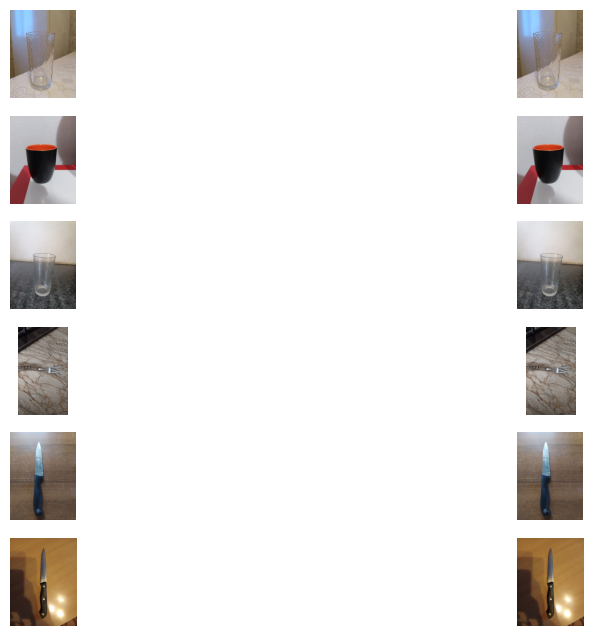

In [40]:
plt.figure(figsize=(12,8))

for idx, img in enumerate(duplicate_img):
    im = PIL.Image.open(img)
    plt.subplot(6,2, idx+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()

## Create directory structure

In [41]:
test_dir.mkdir(parents=True, exist_ok=True)
for label in train_df.label.unique():
    d = train_dir / label
    d.mkdir(parents=True, exist_ok=True)

## Move the images

In [42]:
images = list(img_dir.glob('*.jpg'))
print(f'Found: {len(images)} images')

Found: 9367 images


In [43]:
count = 0
for img in train_df.filename.to_list():
    label = train_df[train_df.filename == img].label.values[0]
    img_path = img_dir / img
    new_path = train_dir.absolute() / label / img
    if not new_path.exists():
        try:
            new_path.write_bytes(img_path.read_bytes())
            count += 1
        except FileNotFoundError:
            pass
print(f'Total moved: {count}')

Total moved: 0


In [44]:
count = 0
for img in test_df.filename.to_list():
    img_path = img_dir / img
    new_path = test_dir.absolute() / img
    if not new_path.exists():
        try:
            new_path.write_bytes(img_path.read_bytes())
            count += 1
        except FileNotFoundError:
            pass
print(f'Total moved: {count}')

Total moved: 0


## Look at results

In [45]:
!tree -L 2 '../data/working/images' | egrep -v .jpg$

../data/working/images
├── test
└── train
    ├── cup
    ├── fork
    ├── glass
    ├── knife
    ├── plate
    └── spoon

8 directories, 3808 files


In [46]:
total_files = 0

for dirpath, dirnames, filenames in os.walk(dataset_dir):
    total_files += len(filenames)
    if len(filenames) > 0:
        print(f"Files in {dirpath}, {len(filenames)}")

print(f"Total files: {total_files}")

Files in ../data/working/images/test, 3808
Files in ../data/working/images/train/fork, 557
Files in ../data/working/images/train/cup, 1135
Files in ../data/working/images/train/plate, 1227
Files in ../data/working/images/train/glass, 742
Files in ../data/working/images/train/spoon, 989
Files in ../data/working/images/train/knife, 909
Total files: 9367
